In [1]:
from IPython.display import YouTubeVideo

# 1. Introduction

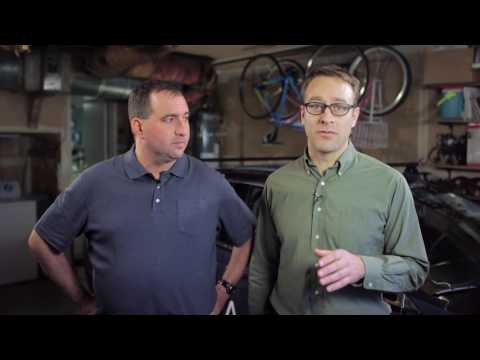

In [2]:
YouTubeVideo('mMT_3k1LvNU', width=720, height=400)

# 2. Bryan Catanzaro

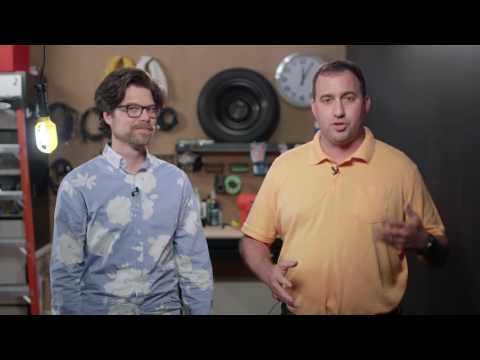

In [3]:
YouTubeVideo('CLIF_6QwlFo', width=720, height=400)

## Bryan Catanzaro
For more information on NVIDIA cuDNN, check out the [official page](https://developer.nvidia.com/cudnn).

# 3. GPU vs. CPU

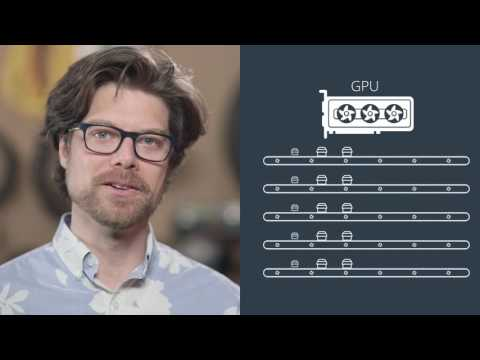

In [4]:
YouTubeVideo('8eP2EpfBli0', width=720, height=400)

## GPU vs CPU Performance Increase Over Time
The chart below gives a general idea of how, over time, GPU performance has increased faster than CPU performance. The data is based on a comparison of NVIDIA GPUs and Intel CPUs.

<img src="img/03-gpus.png" width=600>

# 4. Transfer Learning

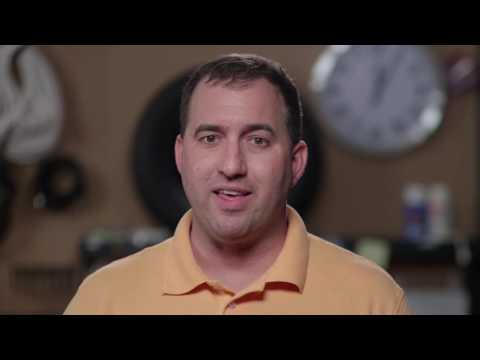

In [5]:
YouTubeVideo('pkCUxzJNtfI', width=720, height=400)

## The Four Main Cases When Using Transfer Learning

Transfer learning involves taking a pre-trained neural network and adapting the neural network to a new, different data set.

Depending on both:

- the size of the new data set, and
- the similarity of the new data set to the original data set

the approach for using transfer learning will be different. There are four main cases:

1. new data set is small, new data is similar to original training data
2. new data set is small, new data is different from original training data
3. new data set is large, new data is similar to original training data
4. new data set is large, new data is different from original training data

<img src="img/02-guide-how-transfer-learning-v3-01.png">
<center>Four Cases When Using Transfer Learning</center>

A large data set might have one million images. A small data could have two-thousand images. The dividing line between a large data set and small data set is somewhat subjective. Overfitting is a concern when using transfer learning with a small data set.

Images of dogs and images of wolves would be considered similar; the images would share common characteristics. A data set of flower images would be different from a data set of dog images.

Each of the four transfer learning cases has its own approach. In the following sections, we will look at each case one by one.

## Demonstration Network
To explain how each situation works, we will start with a generic pre-trained convolutional neural network and explain how to adjust the network for each case. Our example network contains three convolutional layers and three fully connected layers:

<img src="img/02-guide-how-transfer-learning-v3-02.png">
<center>General Overview of a Neural Network</center>

Here is an generalized overview of what the convolutional neural network does:

- the first layer will detect edges in the image
- the second layer will detect shapes
- the third convolutional layer detects higher level features

Each transfer learning case will use the pre-trained convolutional neural network in a different way.

## Case 1: Small Data Set, Similar Data

<img src="img/02-guide-how-transfer-learning-v3-03.png">
<center>Case 1: Small Data Set with Similar Data</center>

If the new data set is small and similar to the original training data:

- slice off the end of the neural network
- add a new fully connected layer that matches the number of classes in the new data set
- randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network
- train the network to update the weights of the new fully connected layer

To avoid overfitting on the small data set, the weights of the original network will be held constant rather than re-training the weights.

Since the data sets are similar, images from each data set will have similar higher level features. Therefore most or all of the pre-trained neural network layers already contain relevant information about the new data set and should be kept.

Here's how to visualize this approach:

<img src="img/02-guide-how-transfer-learning-v3-04.png">
<center>Neural Network with Small Data Set, Similar Data</center>

## Case 2: Small Data Set, Different Data
<img src="img/02-guide-how-transfer-learning-v3-05.png">
<center>Case 2: Small Data Set, Different Data</center>

If the new data set is small and different from the original training data:

- slice off most of the pre-trained layers near the beginning of the network
- add to the remaining pre-trained layers a new fully connected layer that matches the number of classes in the new data set
- randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network
- train the network to update the weights of the new fully connected layer

Because the data set is small, overfitting is still a concern. To combat overfitting, the weights of the original neural network will be held constant, like in the first case.

But the original training set and the new data set do not share higher level features. In this case, the new network will only use the layers containing lower level features.

Here is how to visualize this approach:

<img src="img/02-guide-how-transfer-learning-v3-06.png">
<center>Neural Network with Small Data Set, Different Data</center>

## Case 3: Large Data Set, Similar Data

<img src="img/02-guide-how-transfer-learning-v3-07.png">
<center>Case 3: Large Data Set, Similar Data</center>

If the new data set is large and similar to the original training data:

- remove the last fully connected layer and replace with a layer matching the number of classes in the new data set
- randomly initialize the weights in the new fully connected layer
- initialize the rest of the weights using the pre-trained weights
- re-train the entire neural network

Overfitting is not as much of a concern when training on a large data set; therefore, you can re-train all of the weights.

Because the original training set and the new data set share higher level features, the entire neural network is used as well.

Here is how to visualize this approach:

<img src="img/02-guide-how-transfer-learning-v3-08.png">
<center>Neural Network with Large Data Set, Similar Data</center>

## Case 4: Large Data Set, Different Data

<img src="img/02-guide-how-transfer-learning-v3-09.png">
<center>Case 4: Large Data Set, Different Data</center>

If the new data set is large and different from the original training data:

- remove the last fully connected layer and replace with a layer matching the number of classes in the new data set
- retrain the network from scratch with randomly initialized weights
- alternatively, you could just use the same strategy as the "large and similar" data case

Even though the data set is different from the training data, initializing the weights from the pre-trained network might make training faster. So this case is exactly the same as the case with a large, similar data set.

If using the pre-trained network as a starting point does not produce a successful model, another option is to randomly initialize the convolutional neural network weights and train the network from scratch.

Here is how to visualize this approach:

<img src="img/02-guide-how-transfer-learning-v3-10.png">
<center>Neural Network with Large Data Set, Different Data</center>

# 5. Deep Learning History

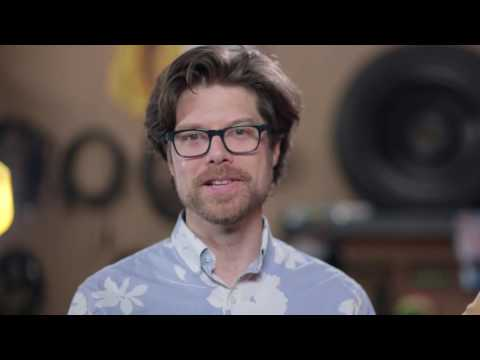

In [6]:
YouTubeVideo('AWWLT4QxKaM', width=720, height=400)

# 6. ImageNet

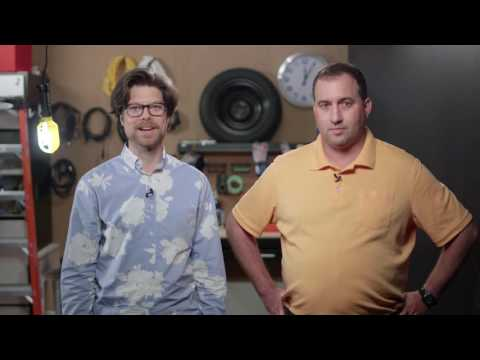

In [7]:
YouTubeVideo('pcNxBs7OAzA', width=720, height=400)

## Imagenet

The terms "aughts" or "oughts" refers to the first decade of a century. In this context the "late aughts" refers to the latter part of the first decade of the 2000's.

# 7. AlexNet

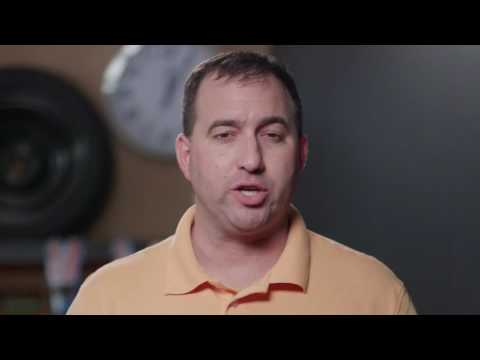

In [9]:
YouTubeVideo('X-QVsH27Mo4', width=720, height=400)

## AlexNet Architecture
AlexNet puts the network on two GPUs, which allows for building a larger network. Although most of the calculations are done in parallel, the GPUs communicate with each other in certain layers. The original research paper on AlexNet said that parallelizing the network decreased the classification error rate by 1.7% when compared to a neural network that used half as many neurons on one GPU.

<img src="img/08-alexnet-1.png">
<center>AlexNet Architecture</center>

# 8. Lab: AlexNet

## Transfer Learning with TensorFlow
**Transfer learning** is the practice of starting with a network that has already been trained, and then applying that network to your own problem.

Because neural networks can often take days or even weeks to train, transfer learning (i.e. starting with a network that somebody else has already trained) can greatly shorten training time.

How do we apply transfer learning? Two popular methods are **feature extraction** and **finetuning**.

1. **Feature extraction**. Take a pretrained neural network and replace the final (classification) layer with a new classification layer, or perhaps even a small feedforward network that ends with a new classification layer. During training the weights in all the pre-trained layers are frozen, so only the weights for the new layer(s) are trained. In other words, the gradient doesn't flow backwards past the first new layer.
2. **Finetuning**. This is similar to feature extraction except the pre-trained weights aren't frozen. The network is trained end-to-end.

The labs in this lesson will focus on feature extraction since it's less computationally intensive.

## Getting Started

1. Set up your environment with the [Udacity CarND Starter Kit](https://github.com/udacity/CarND-Term1-Starter-Kit).
2. Clone the repository containing the code.

```
git clone https://github.com/udacity/CarND-Alexnet-Feature-Extraction
cd CarND-Alexnet-Feature-Extraction
```

3. Download the [training data](https://d17h27t6h515a5.cloudfront.net/topher/2016/October/580a829f_train/train.p) and [AlexNet weights](https://d17h27t6h515a5.cloudfront.net/topher/2016/October/580d880c_bvlc-alexnet/bvlc-alexnet.npy). These links are also available at the bottom of this page under Supporting Materials.
4. Make sure the downloaded files are in the same directory as the code.
5. Open the code in your favorite editor.

## Feature Extraction via AlexNet
Here, you're going to practice feature extraction with [AlexNet](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwiG34CS7vHPAhVKl1QKHW2JAJkQFggcMAA&url=https%3A%2F%2Fpapers.nips.cc%2Fpaper%2F4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf&usg=AFQjCNFlGsSmTUkJw0gLJ0Ry4cm961B7WA&bvm=bv.136593572,d.cGw).

AlexNet is a popular base network for transfer learning because its structure is relatively straightforward, it's not too big, and it performs well empirically.

There is a TensorFlow implementation of AlexNet (adapted from [Michael Guerhoy and Davi Frossard](http://www.cs.toronto.edu/~guerzhoy/tf_alexnet/)) in alexnet.py. You're not going to edit anything in this file but it's a good idea to skim through it to see how AlexNet is defined in TensorFlow.

<img src="img/alexnet-team.jpg" width=600>
<center>The team behind AlexNet. Source: Wired.</center>

Coming up, you'll practice using AlexNet for inference on the image set it was trained on.

After that, you'll extract AlexNet's features and use them to classify images from the [German Traffic Sign Recognition Benchmark dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

## Credits
This lab utilizes:

- An implementation of AlexNet created by [Michael Guerzhoy and Davi Frossard](http://www.cs.toronto.edu/~guerzhoy/tf_alexnet/)
- AlexNet weights provided by the [Berkeley Vision and Learning Center](http://bvlc.eecs.berkeley.edu/)
- Training data from the [German Traffic Sign Recognition Benchmark](http://benchmark.ini.rub.de/?section=gtsrb&subsection=news)

AlexNet was originally trained on the [ImageNet database](http://www.image-net.org/).

Supporting Materials
- [Train](http://video.udacity-data.com.s3.amazonaws.com/topher/2016/October/580a829f_train/train.p)
- [Bvlc Alexnet Weights](http://video.udacity-data.com.s3.amazonaws.com/topher/2016/October/580d880c_bvlc-alexnet/bvlc-alexnet.npy)


# 9. Lab: ImageNet Inference

## ImageNet Inference

<img src="img/screenshot-2016-11-04-22.20.14.png" width=400>
<center>top: Poodle, bottom: Weasel</center>


To start, run imagenet_inference.py, and verify that the network classifies the images correctly.

```
python imagenet_inference.py
```

Your output should look similar to this:

```
Image 0
miniature poodle: 0.389
toy poodle: 0.223
Bedlington terrier: 0.173
standard poodle: 0.150
komondor: 0.026

Image 1
weasel: 0.331
polecat, fitch, foulmart, foumart, Mustela putorius: 0.280
black-footed ferret, ferret, Mustela nigripes: 0.210
mink: 0.081
Arctic fox, white fox, Alopex lagopus: 0.027

Time: 5.587 seconds
```

# 10. Lab: Traffic Sign Inference

<img src="img/screenshot-2016-11-04-22.20.24.png">
<center>top: construction sign, bottom: stop sign</center>

Next, run python traffic_sign_inference.py, and see how well the classifier performs on the example construction and stop signs.

OH NO!

AlexNet expects a 227x227x3 pixel image, whereas the traffic sign images are 32x32x3 pixels.

In order to feed the traffic sign images into AlexNet, you'll need to resize the images to the dimensions that AlexNet expects.

You could resize the images outside of this program, but that approach doesn't scale well. Instead, [use the tf.image.resize_images method](https://www.tensorflow.org/api_guides/python/image#Resizing) to resize the images as they are fed into the model.

Open up traffic_sign_inference.py and complete the TODO(s).

Your output should look similar to this:

```
Image 0
screen, CRT screen: 0.051
digital clock: 0.041
laptop, laptop computer: 0.030
balance beam, beam: 0.027
parallel bars, bars: 0.023

Image 1
digital watch: 0.395
digital clock: 0.275
bottlecap: 0.115
stopwatch, stop watch: 0.104
combination lock: 0.086

Time: 0.592 seconds
```

# 11. Lab: Solution - Traffic Sign Inference

```python
"""
The traffic signs are 32x32 so you
have to resize them to be 227x227 before
passing them to AlexNet.
"""
import time
import tensorflow as tf
import numpy as np
from scipy.misc import imread
from caffe_classes import class_names
from alexnet import AlexNet


# placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
resized = tf.image.resize_images(x, (227, 227))

probs = AlexNet(resized)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# Read Images
im1 = imread("construction.jpg").astype(np.float32)
im1 = im1 - np.mean(im1)

im2 = imread("stop.jpg").astype(np.float32)
im2 = im2 - np.mean(im2)

# Run Inference
t = time.time()
output = sess.run(probs, feed_dict={x: [im1, im2]})

# Print Output
for input_im_ind in range(output.shape[0]):
    inds = np.argsort(output)[input_im_ind, :]
    print("Image", input_im_ind)
    for i in range(5):
        print("%s: %.3f" % (class_names[inds[-1 - i]], output[input_im_ind, inds[-1 - i]]))
    print()

print("Time: %.3f seconds" % (time.time() - t))
```

The notable part being:

```python
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
resized = tf.image.resize_images(x, (227, 227))
```

AlexNet requires images be 227 by 227. So, we use tf.image.resize_images resize the 32 by 32 traffic sign images.

# 12. Lab: Feature Extraction

The problem is that AlexNet was trained on the [ImageNet](http://www.image-net.org/) database, which has 1000 classes of images. You can see the classes in the caffe_classes.py file. None of those classes involves traffic signs.

In order to successfully classify our traffic sign images, you need to remove the final, 1000-neuron classification layer and replace it with a new, 43-neuron classification layer.

This is called feature extraction, because you're basically extracting the image features inferred by the penultimate layer, and passing these features to a new classification layer.

Open feature_extraction.py and complete the TODO(s).

Your output will probably not precisely match the sample output below, since the output will depend on the (probably random) initialization of weights in the network. That being said, the output classes you see should be present in signnames.csv.

```
Image 0
Double curve: 0.059
Ahead only: 0.048
Road work: 0.047
Dangerous curve to the right: 0.047
Road narrows on the right: 0.039

Image 1
General caution: 0.079
No entry: 0.067
Dangerous curve to the right: 0.054
Speed limit (50km/h): 0.053
Ahead only: 0.048

Time: 0.500 seconds
```


# 13 Lab: Solution - Feature Extraction

```python
import time
import tensorflow as tf
import numpy as np
import pandas as pd
from scipy.misc import imread
from alexnet import AlexNet

sign_names = pd.read_csv('signnames.csv')
nb_classes = 43

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
resized = tf.image.resize_images(x, (227, 227))

# Returns the second final layer of the AlexNet model,
# this allows us to redo the last layer specifically for 
# traffic signs model.
fc7 = AlexNet(resized, feature_extract=True)
shape = (fc7.get_shape().as_list()[-1], nb_classes)
fc8W = tf.Variable(tf.truncated_normal(shape, stddev=1e-2))
fc8b = tf.Variable(tf.zeros(nb_classes))
logits = tf.nn.xw_plus_b(fc7, fc8W, fc8b)
probs = tf.nn.softmax(logits)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# Read Images
im1 = imread("construction.jpg").astype(np.float32)
im1 = im1 - np.mean(im1)

im2 = imread("stop.jpg").astype(np.float32)
im2 = im2 - np.mean(im2)

# Run Inference
t = time.time()
output = sess.run(probs, feed_dict={x: [im1, im2]})

# Print Output
for input_im_ind in range(output.shape[0]):
    inds = np.argsort(output)[input_im_ind, :]
    print("Image", input_im_ind)
    for i in range(5):
        print("%s: %.3f" % (sign_names.ix[inds[-1 - i]][1], output[input_im_ind, inds[-1 - i]]))
    print()

print("Time: %.3f seconds" % (time.time() - t))
```

Here's how I did it:

```python
# Returns the second final layer of the AlexNet model,
# this allows us to redo the last layer specifically for 
# traffic signs model.
fc7 = AlexNet(resized, feature_extract=True)
shape = (fc7.get_shape().as_list()[-1], nb_classes)
fc8W = tf.Variable(tf.truncated_normal(shape, stddev=1e-2))
fc8b = tf.Variable(tf.zeros(nb_classes))
logits = tf.nn.xw_plus_b(fc7, fc8W, fc8b)
probs = tf.nn.softmax(logits)
```

First, I figure out the shape of the final fully connected layer, in my opinion this is the trickiest part. To do that I have to figure out the size of the output from fc7. Since it's a fully connected layer I know it's shape will be 2D so the second (or last) element of the list will be the size of the output. fc7.get_shape().as_list()[-1] does the trick. I then combine this with the number of classes for the Traffic Sign dataset to get the shape of the final fully connected layer, shape = (fc7.get_shape().as_list()[-1], nb_classes). The rest of the code is just the standard way to define a fully connected in TensorFlow. Finally, I calculate the probabilities via softmax, probs = tf.nn.softmax(logits).

# 14. Lab: Training the Feature Extractor

The feature extractor you just created works, in the sense that data will flow through the network and result in predictions.

But the predictions aren't accurate, because you haven't yet trained the new classification layer.

In order to do that, you'll need to read in the training dataset and train the network.

Training AlexNet (even just the final layer!) can take a little while, so if you don't have a GPU, running on a subset of the data is a good alternative. As a point of reference one epoch over the training set takes roughly 53-55 seconds with a [GTX 970](http://www.geforce.com/hardware/desktop-gpus/geforce-gtx-970/specifications).

Open up train_feature_extraction.py and complete the TODO(s).

# 15. Lab: Solution - Training the Feature Extractor

```python
import pickle
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from alexnet import AlexNet

nb_classes = 43
epochs = 10
batch_size = 128

with open('./train.p', 'rb') as f:
    data = pickle.load(f)

X_train, X_val, y_train, y_val = train_test_split(data['features'], data['labels'], test_size=0.33, random_state=0)

features = tf.placeholder(tf.float32, (None, 32, 32, 3))
labels = tf.placeholder(tf.int64, None)
resized = tf.image.resize_images(features, (227, 227))

# Returns the second final layer of the AlexNet model,
# this allows us to redo the last layer for the traffic signs
# model.
fc7 = AlexNet(resized, feature_extract=True)
fc7 = tf.stop_gradient(fc7)
shape = (fc7.get_shape().as_list()[-1], nb_classes)
fc8W = tf.Variable(tf.truncated_normal(shape, stddev=1e-2))
fc8b = tf.Variable(tf.zeros(nb_classes))
logits = tf.nn.xw_plus_b(fc7, fc8W, fc8b)

cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels)
loss_op = tf.reduce_mean(cross_entropy)
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss_op, var_list=[fc8W, fc8b])
init_op = tf.initialize_all_variables()

preds = tf.arg_max(logits, 1)
accuracy_op = tf.reduce_mean(tf.cast(tf.equal(preds, labels), tf.float32))


def eval_on_data(X, y, sess):
    total_acc = 0
    total_loss = 0
    for offset in range(0, X.shape[0], batch_size):
        end = offset + batch_size
        X_batch = X[offset:end]
        y_batch = y[offset:end]

        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={features: X_batch, labels: y_batch})
        total_loss += (loss * X_batch.shape[0])
        total_acc += (acc * X_batch.shape[0])

    return total_loss/X.shape[0], total_acc/X.shape[0]

with tf.Session() as sess:
    sess.run(init_op)

    for i in range(epochs):
        # training
        X_train, y_train = shuffle(X_train, y_train)
        t0 = time.time()
        for offset in range(0, X_train.shape[0], batch_size):
            end = offset + batch_size
            sess.run(train_op, feed_dict={features: X_train[offset:end], labels: y_train[offset:end]})

        val_loss, val_acc = eval_on_data(X_val, y_val, sess)
        print("Epoch", i+1)
        print("Time: %.3f seconds" % (time.time() - t0))
        print("Validation Loss =", val_loss)
        print("Validation Accuracy =", val_acc)
        print("")
```

Most of the code should look familiar.

```python
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, labels)
loss_op = tf.reduce_mean(cross_entropy)
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss_op, var_list=[fc8W, fc8b])
init_op = tf.initialize_all_variables()

preds = tf.arg_max(logits, 1)
accuracy_op = tf.reduce_mean(tf.cast(tf.equal(preds, labels), tf.float32))
```

Operations are defined here (training, loss, accuracy, etc); eval_on_data is a utility function to calculate the loss and accuracy over a dataset to evaluate all at once.

```python
with tf.Session() as sess:
    sess.run(init_op)

    for i in range(epochs):
        # training
        X_train, y_train = shuffle(X_train, y_train)
        t0 = time.time()
        for offset in range(0, X_train.shape[0], batch_size):
            end = offset + batch_size
            sess.run(train_op, feed_dict={features: X_train[offset:end], labels: y_train[offset:end]})

        val_loss, val_acc = eval_on_data(X_val, y_val, sess)
        print("Epoch", i+1)
        print("Time: %.3f seconds" % (time.time() - t0))
        print("Validation Loss =", val_loss)
        print("Validation Accuracy =", val_acc)
        print("")
```

This is the main training procedure. As you can see we run train_op on each batch. Additionally, before each epoch the training set is shuffled using shuffle. At the end of each epoch the validation loss and accuracy are recorded and printed out.

Running the above code results in the following results after 10 epochs:

```
Epoch 10
Time: 53.402 seconds
Validation Loss = 0.126141663276
Validation Accuracy = 0.966069240196
```

# 16. Lab: Conclusion

## Congratulations!
You've trained AlexNet as a feature extractor!

Coming up, you'll explore other networks to use for transfer learning.

# 17. AlexNet Today

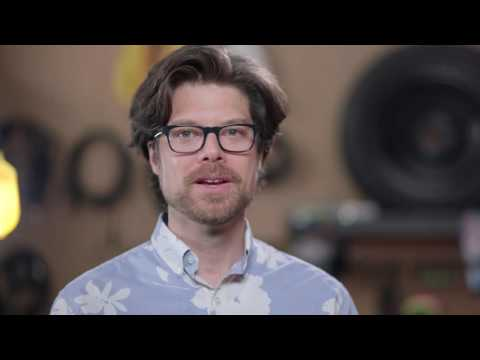

In [11]:
YouTubeVideo('AItZPkRHH_I', width=720, height=400)

# 18. VGG

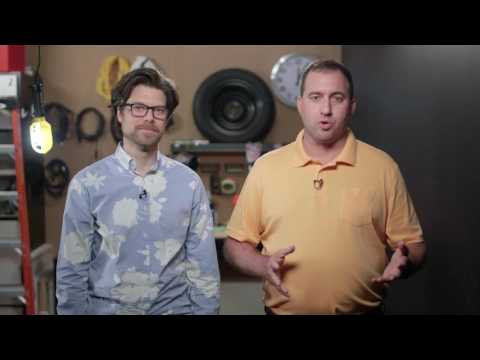

In [12]:
YouTubeVideo('akFO1sH7Q_0', width=720, height=400)

# 19. Empirics

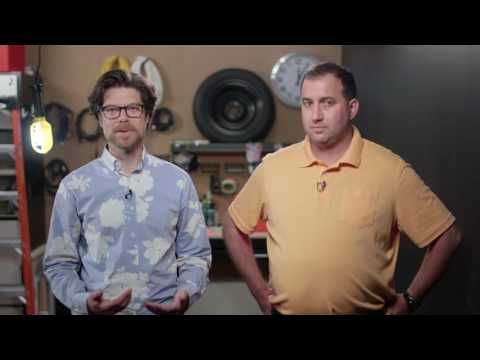

In [13]:
YouTubeVideo('VT8RENbE9Ck', width=720, height=400)

# 20. GoogLeNet

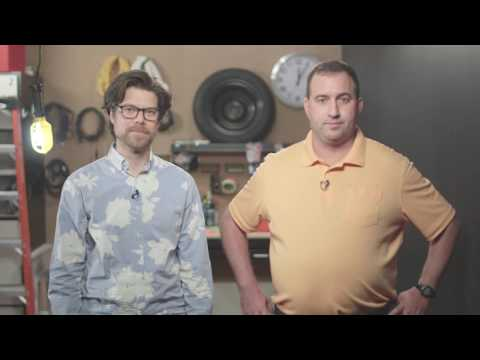

In [14]:
YouTubeVideo('sdT5f8n7IcI', width=720, height=400)

# 21. ResNet

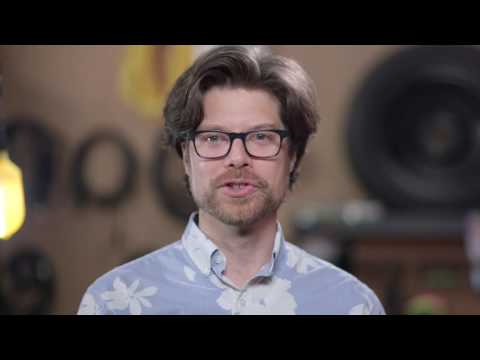

In [15]:
YouTubeVideo('fDCgul26GGk', width=720, height=400)

# 22. Lab: VGG, Inception (GoogLeNet) and ResNet

## Transfer Learning with VGG, Inception (GoogLeNet) and ResNet
In this lab, you will continue exploring transfer learning. You've already explored feature extraction with AlexNet and TensorFlow. Next, you will use Keras to explore feature extraction with the VGG, Inception and ResNet architectures. The models you will use were trained for days or weeks on the [ImageNet dataset](http://www.image-net.org/). Thus, the weights encapsulate higher-level features learned from training on thousands of classes.

There are some notable differences from AlexNet lab.

1. We're using two datasets. First, the German Traffic Sign dataset, and second, the [Cifar10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).
2. **Bottleneck Features**. Unless you have a very powerful GPU, running feature extraction on these models will take a significant amount of time, as you might have observed in the AlexNet lab. To make things easier we've precomputed bottleneck features for each (network, dataset) pair. This will allow you to experiment with feature extraction even on a modest CPU. You can think of bottleneck features as feature extraction but with caching. Because the base network weights are frozen during feature extraction, the output for an image will always be the same. Thus, once the image has already been passed through the network, we can cache and reuse the output.
3. Furthermore, we've limited each class in both training datasets to 100 examples. The idea here is to push feature extraction a bit further. It also greatly reduces the download size and speeds up training. The validation files remain the same.

The files are encoded as such:

- {network}_{dataset}_100_bottleneck_features_train.p
- {network}_{dataset}_bottleneck_features_validation.p

"network", in the above filenames, can be one of 'vgg', 'inception', or 'resnet'.

"dataset" can be either 'cifar10' or 'traffic'.

## Getting Started

1. Download one of the bottleneck feature packs. VGG is the smallest so you might want to give that a shot first. You can download these from the **Supplement Materials** at the bottom of this page.
2. Clone the lab repository

```
git clone https://github.com/udacity/CarND-Transfer-Learning-Lab
cd CarND-Transfer-Learning-Lab
```

3. Open feature_extraction.py in your favourite text editor. We'll go over the code next.

Supporting Materials
- [VGG Bottleneck Features 100](http://video.udacity-data.com.s3.amazonaws.com/topher/2016/November/5834b432_vgg-100/vgg-100.zip)
- [ResNet Bottleneck Features 100](http://video.udacity-data.com.s3.amazonaws.com/topher/2016/November/5834b634_resnet-100/resnet-100.zip)
- [InceptionV3 Bottleneck Features 100](http://video.udacity-data.com.s3.amazonaws.com/topher/2016/November/5834b498_inception-100/inception-100.zip)


# 23. Lab: Cifar10 Aside

Ok, I lied! Before we go over feature_extraction.py I want you to do something first ...

Before you try feature extraction on pretrained models I'd like you to take a moment and run the classifier you used in the Traffic Sign project on the Cifar10 dataset. Cifar10 images are also (32, 32, 3) so the main thing you'll need to change is **the number of classes from 43 to 10**. Cifar10 also doesn't come with a validation set, so you can randomly split training data into a training and validation.

You can easily download and load the Cifar10 dataset like this:

```python
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# y_train.shape is 2d, (50000, 1). While Keras is smart enough to handle this
# it's a good idea to flatten the array.
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
```

You can then use sklearn to split off part of the data into a validation set:

```python
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify = y_train)
```

<img src="img/screenshot-2016-11-03-12.52.54.png" width=600>
<center>Overview of the Cifar10 dataset. Source: Alex Krizhevsky.</center>

While the German Traffic Sign dataset has more classes, the Cifar10 dataset is harder to classify due to the complexity of the classes. A ship is drastically different from a frog, and a frog is nothing like a deer, etc. These are the kind of datasets where the advantage of using a pre-trained model will become much more apparent.

Train your model on the Cifar10 dataset and record your results, keep these in mind when you train from the bottleneck features. Don't be discouraged if you get results significantly worse than the Traffic Sign dataset.

# 24. Lab: Feature Extraction with Cifar10

Cool, now that you have a baseline for Cifar10, let's get started with feature extraction.

## The Code
```python
import pickle
import tensorflow as tf
# TODO: import Keras layers you need here
```

Nothing fancy here, just some imports we need to run the code, pickle is used to load the bottleneck features.

```python
flags = tf.app.flags
FLAGS = flags.FLAGS

# command line flags
flags.DEFINE_string('training_file', '', "Bottleneck features training file (.p)")
flags.DEFINE_string('validation_file', '', "Bottleneck features validation file (.p)")
```

Here we define some command line flags, this avoids having to manually open and edit the file if we want to change the files we train and validate our model with.

Here's how you would run the file from the command line:

```
python feature_extraction.py --training_file vgg_cifar10_100_bottleneck_features_train.p --validation_file vgg_cifar10_bottleneck_features_validation.p
```

Running this program will train feature extraction with the VGG network/Cifar10 dataset bottleneck features. The 100 in vgg_cifar10_100 indicates this file has 100 examples per class.

You could define additional flags if you wish. Possible candidates could be the batch size or the number of epochs.

```python
def load_bottleneck_data(training_file, validation_file):
    """
    Utility function to load bottleneck features.

    Arguments:
        training_file - String
        validation_file - String
    """
    print("Training file", training_file)
    print("Validation file", validation_file)

    with open(training_file, 'rb') as f:
        train_data = pickle.load(f)
    with open(validation_file, 'rb') as f:
        validation_data = pickle.load(f)

    X_train = train_data['features']
    y_train = train_data['labels']
    X_val = validation_data['features']
    y_val = validation_data['labels']

    return X_train, y_train, X_val, y_va
```

A utility function that loads the bottleneck features from the pickled training and validation files.

```python
def main(_):
    # load bottleneck data
    X_train, y_train, X_val, y_val = load_bottleneck_data(FLAGS.training_file, FLAGS.validation_file)

    print(X_train.shape, y_train.shape)
    print(X_val.shape, y_val.shape)

    # TODO: define your model and hyperparams here
    # make sure to adjust the number of classes based on
    # the dataset
    # 10 for cifar10
    # 43 for traffic

    # TODO: train your model here


# parses flags and calls the `main` function above
if __name__ == '__main__':
    tf.app.run()
```

This is where you'll define and train the model. Notice FLAGS.training_file and FLAGS.validation_file are passed into load_bottleneck_data. These refer to the command line flags defined earlier.

Once you've trained your model, record the results. How do they compare to the results from the previous exercise?

# 25. Lab: Solution - Feature Extraction with Cifar10

Here's the solution I came up with

```python
import pickle
import tensorflow as tf
import numpy as np
from keras.layers import Input, Flatten, Dense
from keras.models import Model

flags = tf.app.flags
FLAGS = flags.FLAGS

# command line flags
flags.DEFINE_string('training_file', '', "Bottleneck features training file (.p)")
flags.DEFINE_string('validation_file', '', "Bottleneck features validation file (.p)")
flags.DEFINE_integer('epochs', 50, "The number of epochs.")
flags.DEFINE_integer('batch_size', 256, "The batch size.")


def load_bottleneck_data(training_file, validation_file):
    """
    Utility function to load bottleneck features.

    Arguments:
        training_file - String
        validation_file - String
    """
    print("Training file", training_file)
    print("Validation file", validation_file)

    with open(training_file, 'rb') as f:
        train_data = pickle.load(f)
    with open(validation_file, 'rb') as f:
        validation_data = pickle.load(f)

    X_train = train_data['features']
    y_train = train_data['labels']
    X_val = validation_data['features']
    y_val = validation_data['labels']

    return X_train, y_train, X_val, y_val


def main(_):
    # load bottleneck data
    X_train, y_train, X_val, y_val = load_bottleneck_data(FLAGS.training_file, FLAGS.validation_file)

    print(X_train.shape, y_train.shape)
    print(X_val.shape, y_val.shape)

    nb_classes = len(np.unique(y_train))

    # define model
    input_shape = X_train.shape[1:]
    inp = Input(shape=input_shape)
    x = Flatten()(inp)
    x = Dense(nb_classes, activation='softmax')(x)
    model = Model(inp, x)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # train model
    model.fit(X_train, y_train, epochs=FLAGS.epochs, batch_size=FLAGS.batch_size, validation_data=(X_val, y_val), shuffle=True)


# parses flags and calls the `main` function above
if __name__ == '__main__':
    tf.app.run()
```

Let's go over the changes.

```python
import numpy as np
from keras.layers import Input, Flatten, Dense
from keras.models import Model
```

Import the additional libraries required.

```python
flags.DEFINE_integer('epochs', 50, "The number of epochs.")
flags.DEFINE_integer('batch_size', 256, "The batch size.")
```

I add a couple of command-line flags to set the number of epochs and batch size. This is more for convenience than anything else.

```python
nb_classes = len(np.unique(y_train))
```

Here I find the number of classes for the dataset. np.unique returns all the unique elements of a numpy array. The elements of y_train are integers, 0-9 for Cifar10 and 0-42 for Traffic Signs. So, when combined with len we get back the number of classes.

```python
# define model
input_shape = X_train.shape[1:]
inp = Input(shape=input_shape)
x = Flatten()(inp)
x = Dense(nb_classes, activation='softmax')(x)
model = Model(inp, x)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

Here I define a very simple model, a linear layer (Dense in Keras terms) followed by a softmax activation. The Adam optimizer is used.

```python
# train model
model.fit(X_train, y_train, epochs=FLAGS.epochs, batch_size=FLAGS.batch_size, validation_data=(X_val, y_val), shuffle=True)
```

Finally, the model is trained. Notice here FLAGS.epochs and FLAGS.batch_size are used.
After 50 epochs these are the results for each model:

VGG

```
Epoch 50/50
1000/1000 [==============================] - 0s - loss: 0.2418 - acc: 0.9540 - val_loss: 0.8759 - val_acc: 0.7235
```

Inception

```
Epoch 50/50
1000/1000 [==============================] - 0s - loss: 0.0887 - acc: 1.0000 - val_loss: 1.0428 - val_acc: 0.6556
```

ResNet

```
Epoch 50/50
1000/1000 [==============================] - 0s - loss: 0.0790 - acc: 1.0000 - val_loss: 0.8005 - val_acc: 0.7347
```

# 26. Lab: Feature Extraction with Traffic Signs

I'd like you to now do the same thing but with the German Traffic Sign dataset. The ImageNet dataset with 1000 classes had no traffic sign images. Will the high-level features learned still be transferable to such a different dataset?

Staying with the VGG example:

```
python feature_extraction.py --training_file bottlenecks/vgg_traffic_100_bottleneck_features_train.p --validation_file bottlenecks/vgg_traffic_bottleneck_features_validation.p
```
The only difference in the filename is we're swapping "cifar10" with "traffic".

Depending on how you wrote your solution you may have to manually change the number of classes back to 43 as well.

How do the feature extraction results compare with your results from the Traffic Sign project?

# 27. Lab: Solution - Feature Extraction with Traffic Signs

I used the same code from the Cifar10 solution.

After 50 epochs these are the results for each model:

VGG
```
Epoch 50/50
4300/4300 [==============================] - 0s - loss: 0.0873 - acc: 0.9958 - val_loss: 0.4368 - val_acc: 0.8666
```

Inception

```
Epoch 50/50
4300/4300 [==============================] - 0s - loss: 0.0276 - acc: 1.0000 - val_loss: 0.8378 - val_acc: 0.7519
```

ResNet
```
Epoch 50/50
4300/4300 [==============================] - 0s - loss: 0.0332 - acc: 1.0000 - val_loss: 0.6146 - val_acc: 0.8108
```

# 28. Lab: Transfer Learning Summary

## Congratulations!
You've trained AlexNet, VGG, GoogLeNet, and ResNet as feature extractors!

To end this lab, let's summarize when we should consider:

1. Feature extraction (train only the top-level of the network, the rest of the network remains fixed)
2. Finetuning (train the entire network end-to-end, start with pre-trained weights)
3. Training from scratch (train the entire network end-to-end, start from random weights)

Consider feature extraction when ...

... the new dataset is small and similar to the original dataset. The higher-level features learned from the original dataset should transfer well to the new dataset.

Consider finetuning when ...

... the new dataset is large and similar to the original dataset. Altering the original weights should be safe because the network is unlikely to overfit the new, large dataset.

... the new dataset is small and very different from the original dataset. You could also make the case for training from scratch. If you choose to finetune, it might be a good idea to only use features from the first few layers of the pre-trained network; features from the final layers of the pre-trained network might be too specific to the original dataset.

Consider training from scratch when ...

... the dataset is large and very different from the original dataset. In this case we have enough data to confidently train from scratch. However, even in this case it might be beneficial to initialize the entire network with pretrained weights and finetune it on the new dataset.

Finally, keep in mind that for a lot of problems you won't need an architecture as complicated and powerful as VGG, Inception, or ResNet. These architectures were made for the task of classifying thousands of complex classes. A smaller network might be a better fit for a smaller problem, especially if you can comfortably train it on moderate hardware.

# 29. Outro

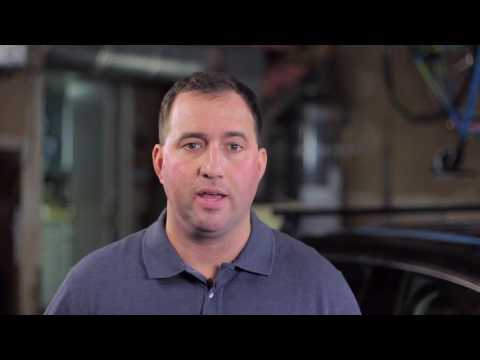

In [16]:
YouTubeVideo('WOrM6qopj7A', width=720, height=400)